# Exploratory data analysis of Kepler candidates dataset.

https://en.wikipedia.org/wiki/Kepler_(spacecraft)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data = pd.read_csv("datasets/NASA/cumulative.csv", sep=",")

In [3]:
data.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [4]:
data.columns

Index(['rowid', 'kepid', 'kepoi_name', 'kepler_name', 'koi_disposition',
       'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss',
       'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_period_err1',
       'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1',
       'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2',
       'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth',
       'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1',
       'koi_prad_err2', 'koi_teq', 'koi_teq_err1', 'koi_teq_err2', 'koi_insol',
       'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_tce_delivname', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2',
       'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad',
       'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec', 'koi_kepmag'],
      dtype='object')

Description of the columns here: https://exoplanetarchive.ipac.caltech.edu/docs/API_kepcandidate_columns.html

## Let's look at some figures

### Magnitude 
See https://en.wikipedia.org/wiki/Magnitude_(astronomy)#Apparent_and_absolute_magnitude


Text(0.5, 1.0, 'All targets')

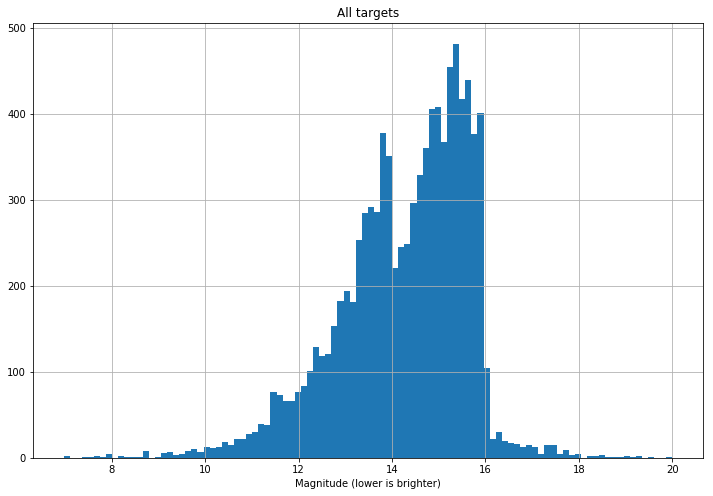

In [5]:
ax = data.koi_kepmag.hist(bins=100, figsize=(12, 8))
ax.set_xlabel("Magnitude (lower is brighter)")
ax.set_title("All targets")

We see what looks like a bi-modal distribution and a sharp cut-off at around 16th magnitude. This is likely the limit at which the noise becomes too much to detect planetary candidates.

Text(0.5, 1.0, 'Confirmed planet')

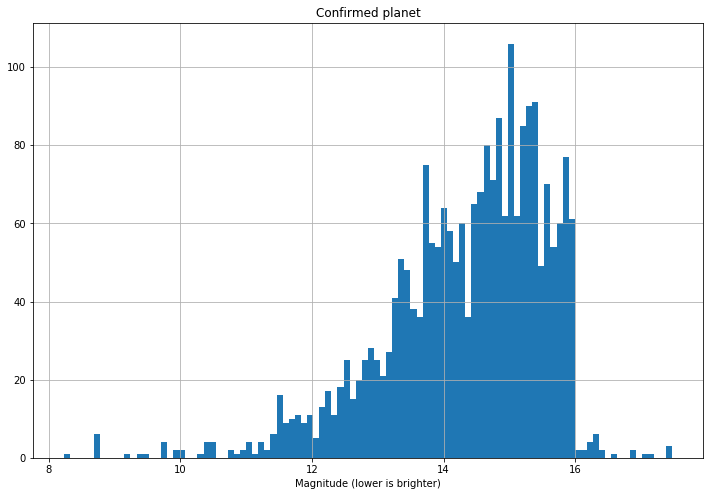

In [6]:
# only the Confirmed planets
ax = data[data.koi_disposition == 'CONFIRMED'].koi_kepmag.hist(bins=100, figsize=(12, 8))
ax.set_xlabel("Magnitude (lower is brighter)")
ax.set_title("Confirmed planet")

### Surface gravity of stars

https://en.wikipedia.org/wiki/Surface_gravity

Text(0.5, 1.0, 'Surface gravity')

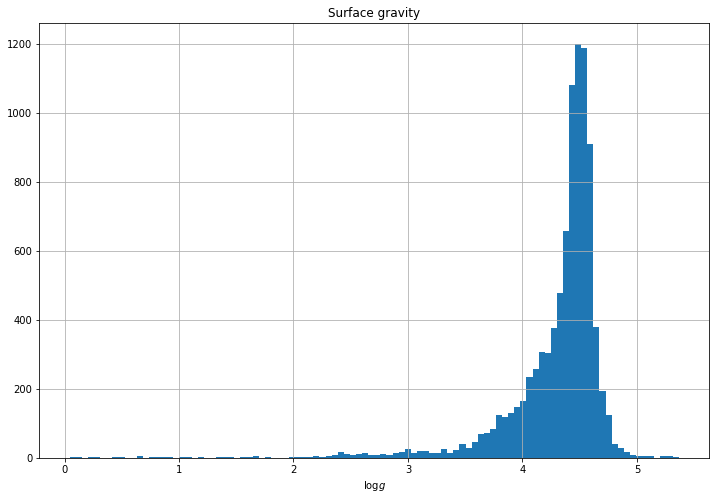

In [7]:
ax = data.koi_slogg.hist(bins=100, figsize=(12, 8))
ax.set_xlabel("$\log{g}$")
ax.set_title("Surface gravity")

### Right Ascension and Declination

https://en.wikipedia.org/wiki/Celestial_coordinate_system

This is the 'latitude' and 'longitude' of the objects, so this plot shows their position in the sky (its a pretty small patch in the sky, don't be fooled.) The telescope pointed at the same patch of sky for the entire mission and the distribution looks the way it does because of it. 

![Here's an image from the CCD array](https://keplerscience.arc.nasa.gov/images/kepler-fov-full.jpg)

The density of stars increases towards the one side, that's the side closer to the bulge of the Milky Way.

In [8]:
confirmed = data[data.koi_disposition == 'CONFIRMED']

ra, dec = data.ra, data.dec
ra_c, dec_c = confirmed.ra, confirmed.dec

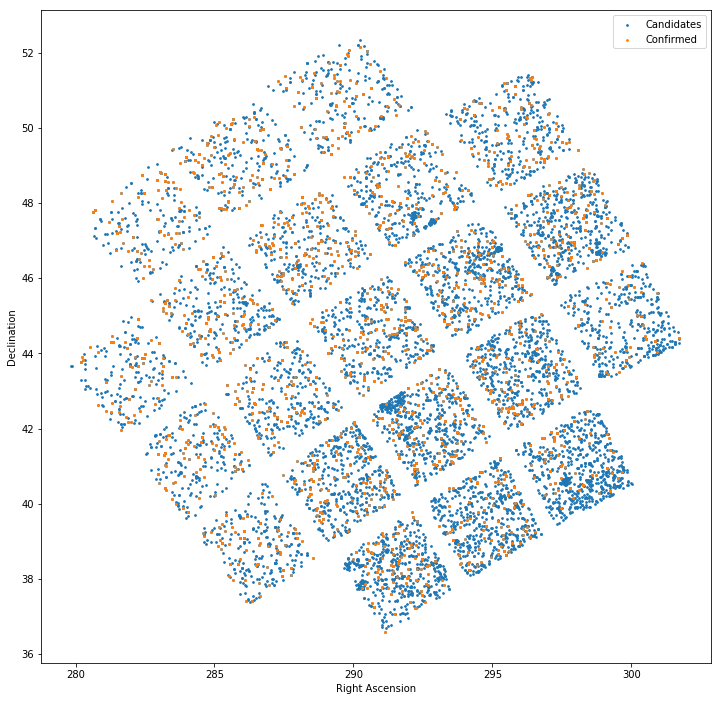

In [9]:
fig = plt.figure(figsize=(12, 12))

plt.scatter(ra, dec, s=3, label='Candidates')
plt.scatter(ra_c, dec_c, s=3, label="Confirmed")

plt.xlabel("Right Ascension")
plt.ylabel("Declination")

plt.legend()

### Orbital periods of confirmed planets

https://en.wikipedia.org/wiki/Orbital_period

Text(0.5, 0, 'Orbital Period (days)')

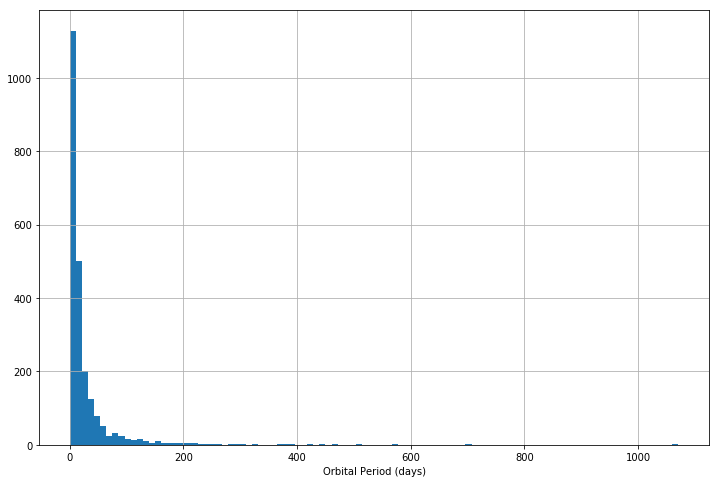

In [10]:
ax = confirmed.koi_period.hist(bins=100, figsize=(12, 8))
ax.set_xlabel("Orbital Period (days)")

Most confirmed planets have lower orbital periods. This makes sense, the closer the planet is to its parent star, the more likely it is to eclipse it (and hence the more likely it is to be observed.)

### Duration of planetary transits

Text(0.5, 0, 'Duration of transit (hours)')

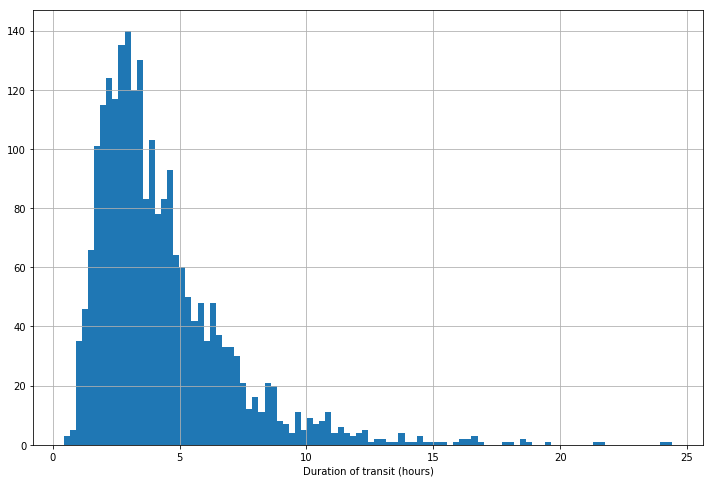

In [11]:
ax = confirmed.koi_duration.hist(bins=100, figsize=(12, 8))
ax.set_xlabel("Duration of transit (hours)")

Durations are on the order of hours, with more detections at smaller hours, again showing the detection bias towards smaller orbits.

### Temperatures and Radii of stars and planets

https://en.wikipedia.org/wiki/Effective_temperature

https://en.wikipedia.org/wiki/Solar_radius

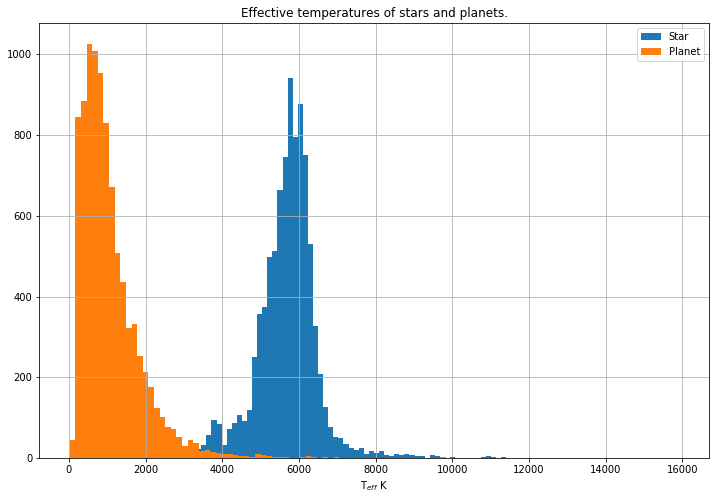

In [12]:
ax = data.koi_steff.hist(bins=100, figsize=(12, 8), label="Star")
ax.set_xlabel("T$_{eff}$ K")
ax.set_title("Effective temperatures of stars and planets.")

data.koi_teq.hist(ax=ax, bins=100, label='Planet')
ax.legend()

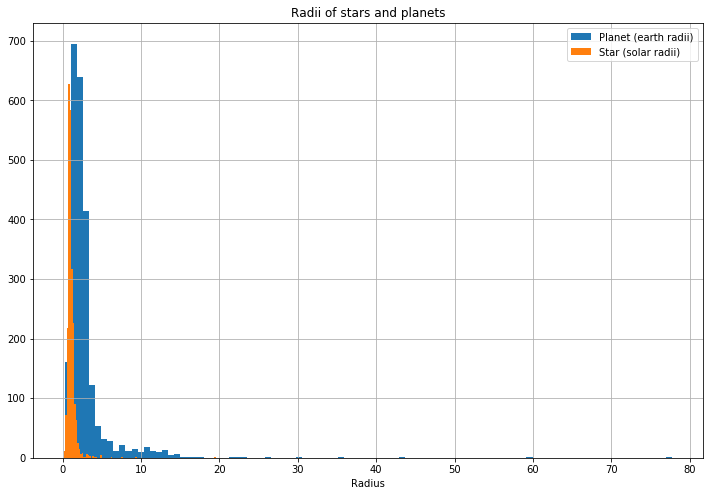

In [14]:
# radius only for stars with a confirmed planet, the rest is not known.
ax = confirmed.koi_prad.hist(bins=100, label='Planet (earth radii)')
ax.set_title("Radii of stars and planets")

confirmed.koi_srad.hist(ax=ax, bins=100, figsize=(12, 8), label="Star (solar radii)")
ax.set_xlabel("Radius")
ax.legend()


#### End of reference notebook, from here is my work

### koi_disposition exploration:

In [17]:
import numpy as np

unique, counts = np.unique(data.koi_disposition, return_counts=True)
dict(zip(unique, counts))

{'CANDIDATE': 2248, 'CONFIRMED': 2293, 'FALSE POSITIVE': 5023}

Yes there are only 3 values

### Split train/test data

We want train and test data have roughly the same percentage of different values of koi_disposition, so let's do the same thing as in lab 1

In [239]:
data.shape

(9564, 50)

In [240]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.15, random_state=42)
for train_index, test_index in split.split(data, data["koi_disposition"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [241]:
shape = (strat_train_set.shape, strat_test_set.shape)
shape

((8129, 50), (1435, 50))

In [242]:
strat_test_set["koi_disposition"].value_counts() / len(strat_test_set)

FALSE POSITIVE    0.525436
CONFIRMED         0.239721
CANDIDATE         0.234843
Name: koi_disposition, dtype: float64

In [243]:
strat_train_set["koi_disposition"].value_counts() / len(strat_train_set)

FALSE POSITIVE    0.525157
CONFIRMED         0.239759
CANDIDATE         0.235084
Name: koi_disposition, dtype: float64

## Data preparation

In [244]:
drop_cols = [c for c in strat_train_set.columns if c.lower()[-4:-1] == 'err']
drop_cols

['koi_period_err1',
 'koi_period_err2',
 'koi_time0bk_err1',
 'koi_time0bk_err2',
 'koi_impact_err1',
 'koi_impact_err2',
 'koi_duration_err1',
 'koi_duration_err2',
 'koi_depth_err1',
 'koi_depth_err2',
 'koi_prad_err1',
 'koi_prad_err2',
 'koi_teq_err1',
 'koi_teq_err2',
 'koi_insol_err1',
 'koi_insol_err2',
 'koi_steff_err1',
 'koi_steff_err2',
 'koi_slogg_err1',
 'koi_slogg_err2',
 'koi_srad_err1',
 'koi_srad_err2']

In [245]:
strat_train_set = strat_train_set.drop(columns=drop_cols)
strat_train_set.shape

(8129, 28)

**drop all the error columns**

In [246]:
strat_train_set = strat_train_set.drop(columns=['koi_score', 'rowid', 'kepid', 'kepoi_name', 'koi_pdisposition'])
strat_train_set.shape

(8129, 23)

In [247]:
strat_train_set.columns

Index(['kepler_name', 'koi_disposition', 'koi_fpflag_nt', 'koi_fpflag_ss',
       'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_time0bk',
       'koi_impact', 'koi_duration', 'koi_depth', 'koi_prad', 'koi_teq',
       'koi_insol', 'koi_model_snr', 'koi_tce_plnt_num', 'koi_tce_delivname',
       'koi_steff', 'koi_slogg', 'koi_srad', 'ra', 'dec', 'koi_kepmag'],
      dtype='object')

In [248]:
strat_train_set.head()

,kepler_name,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,...,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
2292,Kepler-446 b,CONFIRMED,0,0,0,0,1.565413,132.912810,0.003,0.7572,...,41.85,48.6,1.0,q1_q17_dr25_tce,3464.0,4.923,0.328,282.25021,44.921108,16.257
5286,NaN,FALSE POSITIVE,0,1,1,1,2.178155,132.024330,1.223,3.5302,...,457.16,89.2,1.0,q1_q17_dr25_tce,5515.0,4.624,0.712,288.00998,46.306061,14.489
2883,Kepler-510 b,CONFIRMED,0,0,0,0,19.556620,189.043540,0.606,8.0870,...,95.35,111.0,1.0,q1_q17_dr25_tce,5671.0,4.094,1.360,287.65500,39.244289,11.947
9450,NaN,CANDIDATE,0,0,0,0,0.805942,132.127874,1.339,1.4432,...,1189.65,55.4,1.0,q1_q17_dr25_tce,5022.0,4.597,0.672,291.55447,51.043201,14.169
1212,NaN,FALSE POSITIVE,0,1,0,0,9.771463,135.584899,0.946,1.7670,...,96.39,215.0,1.0,q1_q17_dr25_tce,5812.0,4.551,0.853,286.14938,49.867512,14.245


We also don't need kepler_name

In [249]:
strat_train_set = strat_train_set.drop(columns=['kepler_name', 'koi_tce_delivname'])
strat_train_set.shape

(8129, 21)

In [250]:
columns_keep = ['koi_disposition', 'koi_fpflag_nt', 'koi_fpflag_ss',
       'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_time0bk',
       'koi_impact', 'koi_duration', 'koi_depth', 'koi_prad', 'koi_teq',
       'koi_insol', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_steff', 'koi_slogg', 'koi_srad', 'ra', 'dec', 'koi_kepmag']

strat_test_set = strat_test_set.filter(items=columns_keep)
strat_test_set.shape

(1435, 21)

### Missing values

In [251]:
strat_train_set.isnull().sum()

koi_disposition       0
koi_fpflag_nt         0
koi_fpflag_ss         0
koi_fpflag_co         0
koi_fpflag_ec         0
koi_period            0
koi_time0bk           0
koi_impact          310
koi_duration          0
koi_depth           310
koi_prad            310
koi_teq             310
koi_insol           275
koi_model_snr       310
koi_tce_plnt_num    305
koi_steff           310
koi_slogg           310
koi_srad            310
ra                    0
dec                   0
koi_kepmag            1
dtype: int64

**Ok so it seems like most of our missing values comme from a same batch of observations. So I will go ahead and just get rid of any obs with missing values because I think it's ok to sacrifice around 400 obs**

In [252]:
strat_train_set.dropna(inplace=True)
strat_test_set.dropna(inplace=True)
(strat_train_set.shape, strat_test_set.shape)

((7594, 21), (1351, 21))

Ok great only more than 600 obs

I want to try out some feature scaling but I'm not that all confident so let's have a back up dataset

In [253]:
back_up_train = strat_train_set
back_up_train.shape

(7594, 21)

## Build Machine Learning Models

### Feature Scaling 

In [254]:
back_up_train['koi_disposition'] = np.where(back_up_train['koi_disposition'] == 'CONFIRMED', 1, 0)
strat_test_set['koi_disposition'] = np.where(strat_test_set['koi_disposition'] == 'CONFIRMED', 1, 0)
y_train = back_up_train['koi_disposition']
y_test = strat_test_set['koi_disposition']
back_up_train = back_up_train.drop(columns = 'koi_disposition')
strat_test_set = strat_test_set.drop(columns = 'koi_disposition')
y_train.shape, back_up_train.shape

((7594,), (7594, 20))

In [255]:
y_train.head()

2292    1
5286    0
2883    1
9450    0
1212    0
Name: koi_disposition, dtype: int32

In [257]:
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{0: 5652, 1: 1942}

In [259]:
from sklearn import preprocessing

X_scaled = preprocessing.scale(back_up_train)
X_scaled

array([[-0.43385879, -0.57339681, -0.51010369, ..., -2.05236559,
         0.31569565,  1.43877775],
       [-0.43385879,  1.74399296,  1.96038574, ..., -0.85005303,
         0.70116405,  0.15355605],
       [-0.43385879, -0.57339681, -0.51010369, ..., -0.92415267,
        -1.26431053, -1.69431362],
       ...,
       [-0.43385879, -0.57339681, -0.51010369, ..., -0.04005236,
        -0.54830889,  0.21243781],
       [-0.43385879, -0.57339681, -0.51010369, ..., -1.55858157,
        -1.29583094,  0.45741502],
       [-0.43385879, -0.57339681, -0.51010369, ...,  0.89431748,
         2.09653963,  0.7714511 ]])

In [260]:
X_test_scaled = preprocessing.scale(strat_test_set)
X_test_scaled

array([[-0.45414755,  1.85582298, -0.48817361, ...,  1.19279994,
        -0.89096864, -1.39117512],
       [-0.45414755, -0.5388445 , -0.48817361, ..., -0.87727725,
         0.51092329,  0.07688778],
       [-0.45414755,  1.85582298,  2.04845157, ...,  0.96022669,
         1.66821605, -0.4230193 ],
       ...,
       [-0.45414755,  1.85582298, -0.48817361, ...,  0.78307949,
        -0.29880204,  3.15952537],
       [-0.45414755, -0.5388445 , -0.48817361, ..., -0.42743818,
        -0.70037056,  0.14977556],
       [ 2.20192753, -0.5388445 ,  2.04845157, ..., -0.24952058,
        -0.37436635,  0.47445747]])

In [261]:
X_scaled.mean(axis=0)

array([ 4.67831667e-19,  6.54964334e-18, -4.67831667e-18, -9.35663334e-19,
       -1.02922967e-17,  2.69704956e-16,  5.70754634e-17,  1.16957917e-17,
       -2.33915833e-18,  1.87132667e-18,  3.18125534e-17, -1.87132667e-18,
       -4.11691867e-17, -6.73677600e-17,  3.49002424e-16,  1.61635841e-16,
       -1.12279600e-17,  7.48530667e-15,  9.65838476e-16, -8.38354347e-16])

In [262]:
X_scaled.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [263]:
X_test_scaled.mean(axis=0)

array([ 4.30612039e-17, -7.75759093e-17,  2.62969184e-18, -2.49820725e-17,
        7.62610634e-17, -1.18336133e-17,  1.57781511e-17, -6.96868338e-17,
        1.57781511e-17,  0.00000000e+00, -1.14391595e-16, -1.31484592e-17,
        3.41859939e-17,  3.15563021e-17, -7.88907553e-17, -1.56466665e-16,
        5.25938368e-18,  5.54602010e-15,  1.52259158e-15, -4.23380387e-16])

In [264]:
X_test_scaled.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [265]:
scaler_train = preprocessing.StandardScaler().fit(back_up_train)
scaler_train.transform(back_up_train)

array([[-0.43385879, -0.57339681, -0.51010369, ..., -2.05236559,
         0.31569565,  1.43877775],
       [-0.43385879,  1.74399296,  1.96038574, ..., -0.85005303,
         0.70116405,  0.15355605],
       [-0.43385879, -0.57339681, -0.51010369, ..., -0.92415267,
        -1.26431053, -1.69431362],
       ...,
       [-0.43385879, -0.57339681, -0.51010369, ..., -0.04005236,
        -0.54830889,  0.21243781],
       [-0.43385879, -0.57339681, -0.51010369, ..., -1.55858157,
        -1.29583094,  0.45741502],
       [-0.43385879, -0.57339681, -0.51010369, ...,  0.89431748,
         2.09653963,  0.7714511 ]])

In [266]:
scaler_test = preprocessing.StandardScaler().fit(strat_test_set)
scaler_test.transform(strat_test_set)

array([[-0.45414755,  1.85582298, -0.48817361, ...,  1.19279994,
        -0.89096864, -1.39117512],
       [-0.45414755, -0.5388445 , -0.48817361, ..., -0.87727725,
         0.51092329,  0.07688778],
       [-0.45414755,  1.85582298,  2.04845157, ...,  0.96022669,
         1.66821605, -0.4230193 ],
       ...,
       [-0.45414755,  1.85582298, -0.48817361, ...,  0.78307949,
        -0.29880204,  3.15952537],
       [-0.45414755, -0.5388445 , -0.48817361, ..., -0.42743818,
        -0.70037056,  0.14977556],
       [ 2.20192753, -0.5388445 ,  2.04845157, ..., -0.24952058,
        -0.37436635,  0.47445747]])

### Apply SGDClassifier

In [267]:
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier


def the_one_that_does_it_all(algo, X_train, y_train, cv): 
    model = algo.fit(X_train, y_train)
    accuracy_model = round(model.score(X_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = ms.cross_val_predict(algo, X_train, y_train, cv=cv)
    
    # Cross-validation accuracy metric
    accuracy_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return train_pred, accuracy_model, accuracy_cv


In [268]:
import warnings
warnings.filterwarnings('ignore')

In [269]:
train_pred_sgdc, acc_sgdc, acc_cv_sgdc = the_one_that_does_it_all(SGDClassifier(), X_scaled, y_train, 10)

print("Accuracy: %s" % acc_sgdc)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgdc)

Accuracy: 78.94
Accuracy CV 10-Fold: 78.76


That was without any hyperparameters tuning

Let's try to tune some

In [271]:
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3)

train_pred_sgdc2, acc_sgdc2, acc_cv_sgdc2 = the_one_that_does_it_all(sgd_clf, X_scaled, y_train, 10)

print("Accuracy: %s" % acc_sgdc2)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgdc2)

Accuracy: 81.06
Accuracy CV 10-Fold: 80.21


Alright we see improvement already

### Tuning Hyperparameters

In [272]:
from sklearn.model_selection import GridSearchCV

param_grid = {'penalty':['l2','l1','elasticnet'], 'loss':['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron']}
grid_search = GridSearchCV(sgd_clf,
                           param_grid,  
                           scoring='accuracy',
                           cv=10, 
                           return_train_score=True)

grid_search.fit(X_scaled, y_train)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=1000,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=0.001,
       validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ['l2', 'l1', 'elasticnet'], 'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [273]:
grid_search.best_params_

{'loss': 'log', 'penalty': 'l2'}

In [274]:
grid_search.best_estimator_

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=0.001,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [275]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_loss,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.032547,0.007208,0.000000,0.000000,hinge,l2,"{'loss': 'hinge', 'penalty': 'l2'}",0.791064,0.819974,0.795784,...,0.801463,0.811266,0.812143,0.811997,0.814045,0.812582,0.786101,0.808193,0.807363,0.007964
1,0.054387,0.005339,0.000000,0.000000,hinge,l1,"{'loss': 'hinge', 'penalty': 'l1'}",0.821288,0.808147,0.814229,...,0.816533,0.802195,0.803658,0.804389,0.816533,0.809949,0.812729,0.810973,0.808738,0.005078
2,0.055397,0.010441,0.000208,0.000625,hinge,elasticnet,"{'loss': 'hinge', 'penalty': 'elasticnet'}",0.787122,0.822602,0.774704,...,0.774543,0.812875,0.804097,0.802341,0.811119,0.795172,0.809217,0.807608,0.801495,0.010946
3,0.047352,0.007076,0.000000,0.000000,log,l2,"{'loss': 'log', 'penalty': 'l2'}",0.821288,0.833114,0.803689,...,0.803950,0.815655,0.811851,0.815801,0.804682,0.812582,0.807608,0.818873,0.810406,0.004991
4,0.076346,0.024215,0.001198,0.001831,log,l1,"{'loss': 'log', 'penalty': 'l1'}",0.825230,0.831800,0.807642,...,0.804828,0.815508,0.803658,0.812143,0.816971,0.803804,0.811558,0.808486,0.809265,0.004581
5,0.070650,0.010786,0.001345,0.001778,log,elasticnet,"{'loss': 'log', 'penalty': 'elasticnet'}",0.818660,0.833114,0.830040,...,0.816679,0.810973,0.813753,0.806291,0.816094,0.802780,0.816240,0.809217,0.812162,0.004724
6,0.062217,0.019507,0.000395,0.001184,modified_huber,l2,"{'loss': 'modified_huber', 'penalty': 'l2'}",0.746386,0.810775,0.811594,...,0.794879,0.774835,0.800146,0.778932,0.791075,0.762985,0.767228,0.810534,0.782591,0.017602
7,0.212546,0.106582,0.001259,0.001631,modified_huber,l1,"{'loss': 'modified_huber', 'penalty': 'l1'}",0.796321,0.802891,0.770751,...,0.768105,0.788442,0.811997,0.805706,0.798098,0.768837,0.784492,0.797805,0.787551,0.014907
8,0.092371,0.007840,0.000252,0.000756,modified_huber,elasticnet,"{'loss': 'modified_huber', 'penalty': 'elastic...",0.795007,0.851511,0.807642,...,0.801317,0.798683,0.785808,0.794440,0.799561,0.786979,0.801317,0.785808,0.796346,0.007216
9,0.118725,0.082550,0.001596,0.001955,squared_hinge,l2,"{'loss': 'squared_hinge', 'penalty': 'l2'}",0.798949,0.773982,0.737813,...,0.743526,0.765033,0.765764,0.741478,0.772348,0.769568,0.799561,0.760059,0.761902,0.019209


In [276]:
sgd_clf_searched = SGDClassifier(max_iter=1000, tol=1e-3, loss = 'log', penalty = 'l2')

train_pred_sgdcs, acc_sgdcs, acc_cv_sgdcs = the_one_that_does_it_all(sgd_clf_searched, X_scaled, y_train, 10)

print("Accuracy: %s" % acc_sgdcs)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgdcs)

Accuracy: 80.5
Accuracy CV 10-Fold: 80.27


### Evaluation

Using your best system, follow the notebook for Chapter 3 and find the precision, recall, and F1 score for your best model on the test set.

In [279]:
model = sgd_clf_searched.fit(X_scaled, y_train)

y_test_pred = model.predict(X_test_scaled)

y_test_pred.shape

(1351,)

In [282]:
from sklearn.metrics import precision_score, recall_score

precisionScore = precision_score(y_test, y_test_pred)
recallScore = recall_score(y_test, y_test_pred)

print("Precision Score: %s" % precisionScore)
print("Recall Score: %s" % recallScore)

Precision Score: 0.6204379562043796
Recall Score: 0.7434402332361516


In [283]:
from sklearn.metrics import f1_score

f1Score = f1_score(y_test, y_test_pred)

print("f1 Score: %s" % f1Score)

f1 Score: 0.6763925729442971


In [284]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)

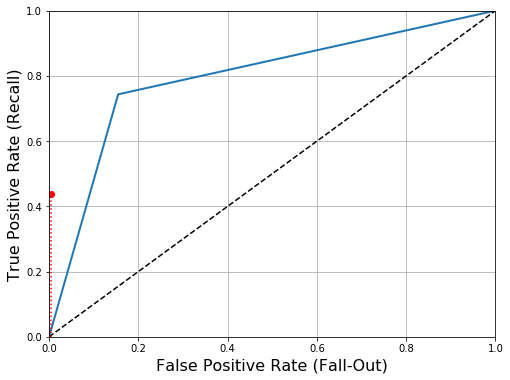

In [286]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                         # Not shown
plot_roc_curve(fpr, tpr)
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:") # Not shown
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")  # Not shown
plt.plot([4.837e-3], [0.4368], "ro")               # Not shown
#save_fig("roc_curve_plot")                         # Not shown
plt.show()

In [287]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_test_pred)

0.7943391642371234

End of lab 2